In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [41]:
car=pd.read_csv('quikr_car.csv')

In [42]:
backup=car.copy()

In [43]:
car=car[car['year'].str.isnumeric()]

In [44]:
car['year']=car['year'].astype(int)

<ipython-input-44-c95edc1f455b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [45]:
car=car[car['Price']!='Ask For Price']

In [46]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [47]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [48]:
car=car[car['kms_driven'].str.isnumeric()]

In [49]:
car['kms_driven']=car['kms_driven'].astype(int)

In [50]:
car=car[~car['fuel_type'].isna()]

In [51]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

<ipython-input-51-137a2849bc1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')


In [52]:
car=car.reset_index(drop=True)

In [53]:
car.to_csv('Cleaned_Car_data.csv')

In [54]:
car.describe(include='all')

name company         year         Price     kms_driven  \
count                   816     816   816.000000  8.160000e+02     816.000000   
unique                  254      25          NaN           NaN            NaN   
top     Maruti Suzuki Swift  Maruti          NaN           NaN            NaN   
freq                     51     221          NaN           NaN            NaN   
mean                    NaN     NaN  2012.444853  4.117176e+05   46275.531863   
std                     NaN     NaN     4.002992  4.751844e+05   34297.428044   
min                     NaN     NaN  1995.000000  3.000000e+04       0.000000   
25%                     NaN     NaN  2010.000000  1.750000e+05   27000.000000   
50%                     NaN     NaN  2013.000000  2.999990e+05   41000.000000   
75%                     NaN     NaN  2015.000000  4.912500e+05   56818.500000   
max                     NaN     NaN  2019.000000  8.500003e+06  400000.000000   

       fuel_type  
count        816  
unique         3  
top       Petrol  
freq         428  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [55]:
car=car[car['Price']<6000000]

In [56]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [57]:
import seaborn as sns

<ipython-input-58-985898158040>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


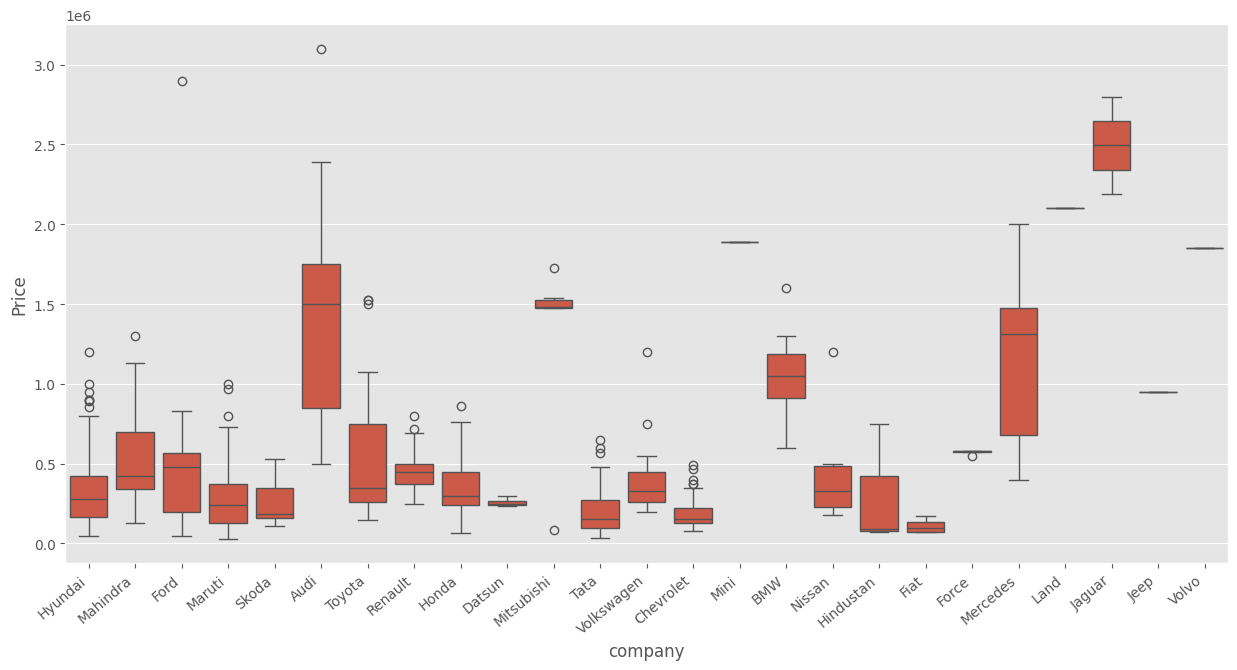

In [58]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.7% of the points cannot be placed

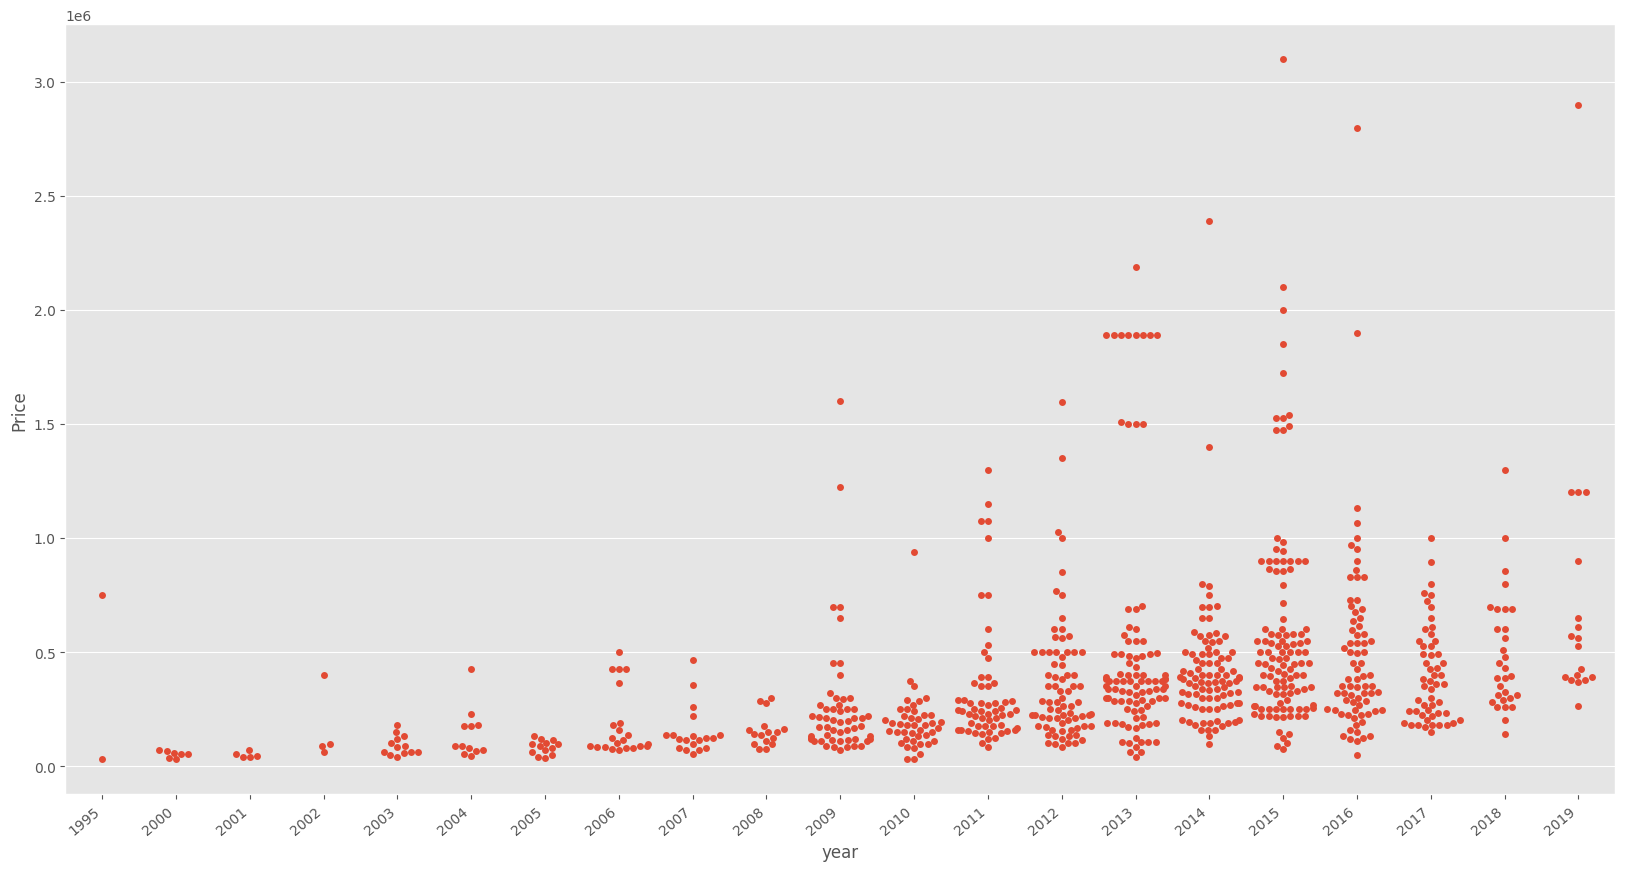

In [59]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

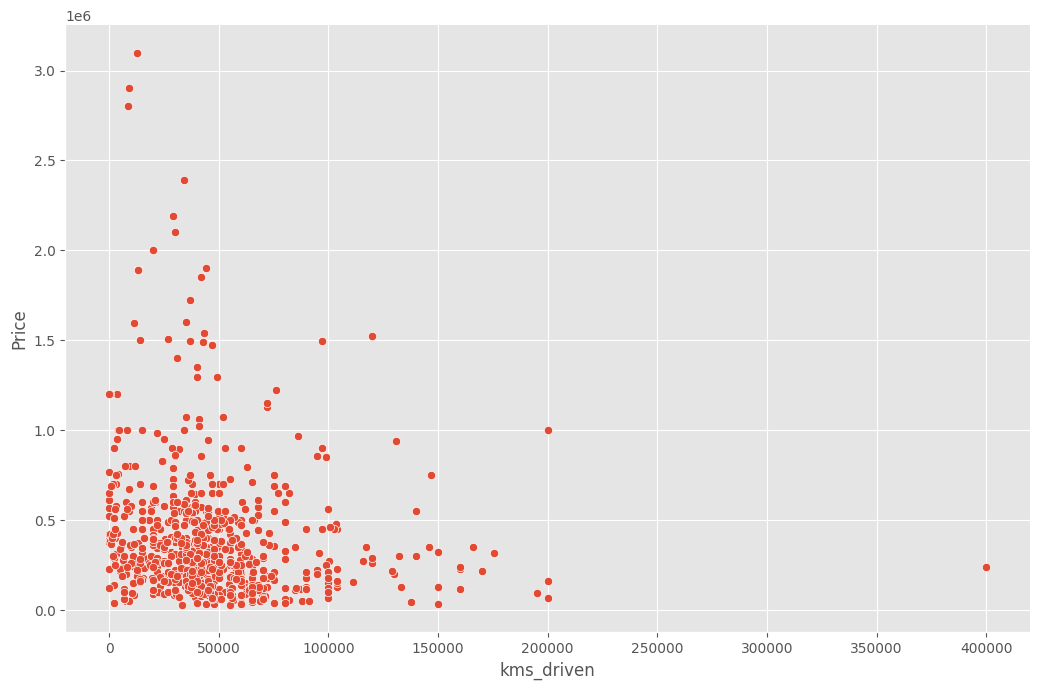

In [60]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

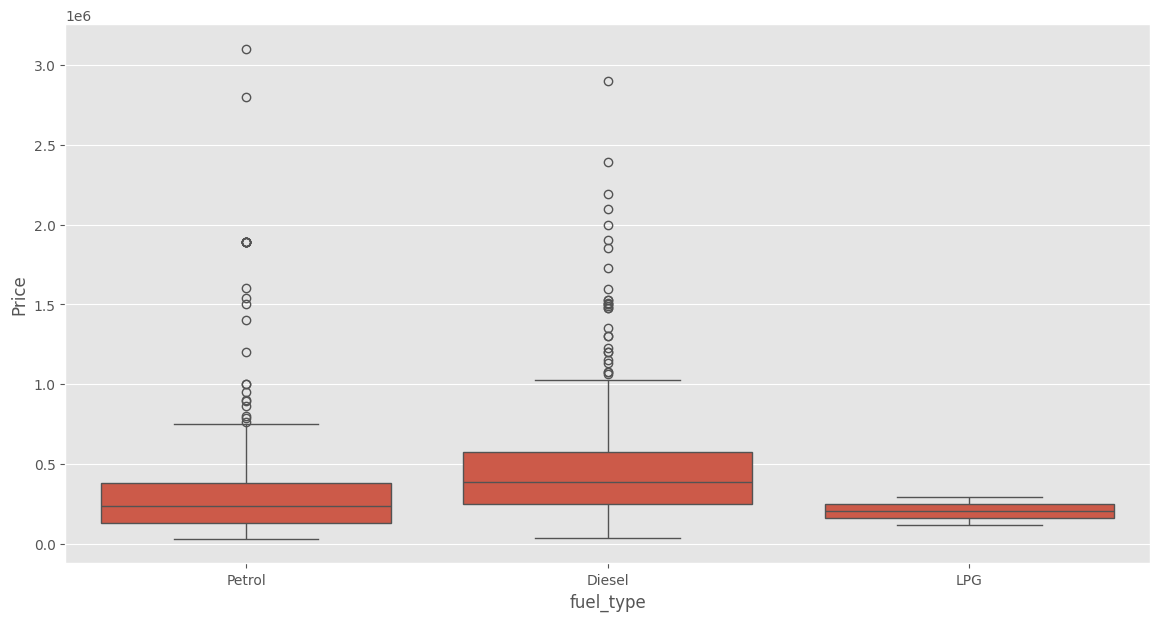

In [61]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

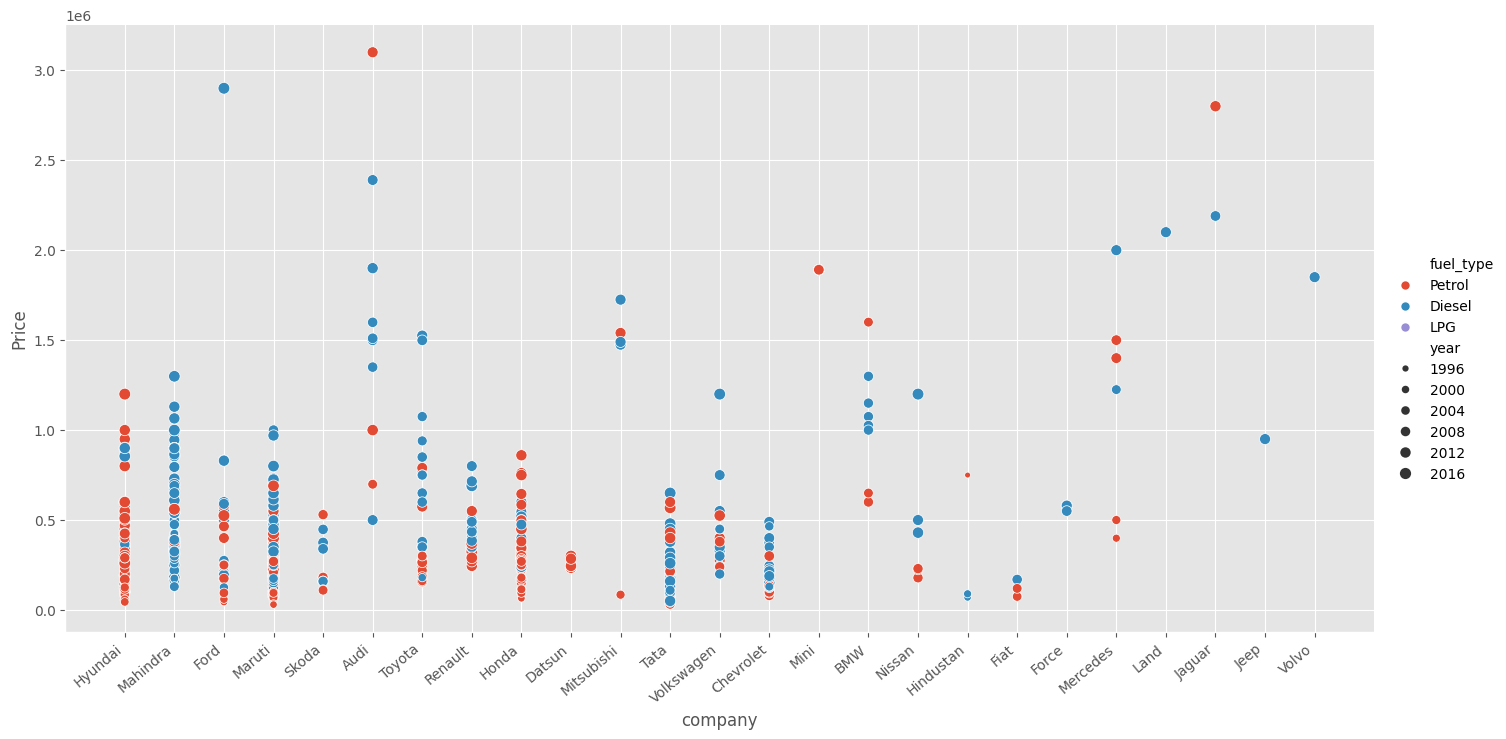

In [62]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [63]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [64]:
X

name   company  year  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006          40    Diesel
2         Hyundai Grand i10   Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014       36000    Diesel
4                 Ford Figo      Ford  2012       41000    Diesel
..                      ...       ...   ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011       50000    Petrol
812          Tata Indica V2      Tata  2009       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009      132000    Petrol
814            Tata Zest XM      Tata  2018       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013       40000    Diesel

[815 rows x 5 columns]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [68]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [69]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [70]:
lr=LinearRegression()

In [71]:
pipe=make_pipeline(column_trans,lr)

In [72]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [73]:
y_pred=pipe.predict(X_test)

In [74]:
r2_score(y_test,y_pred)

0.7247960726959713

In [75]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [76]:
np.argmax(scores)

302

In [77]:
scores[np.argmax(scores)]

0.8991190499074018

In [78]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430382.81414542])

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991190499074018

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [83]:
import pickle

In [84]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [85]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456549.33356479])